In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/train.csv', nrows=1870000)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870000 entries, 0 to 1869999
Data columns (total 26 columns):
Id                 int64
groupId            int64
matchId            int64
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
maxPlace           int64
numGroups          int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(20)
memory usage: 370.9 MB


In [4]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [5]:
df.groupby(['groupId'])['heals'].mean()

groupId
1           1.666667
2           0.000000
7           3.000000
9           0.000000
10          0.000000
12          0.666667
14          0.000000
16          0.333333
17          0.000000
18          0.000000
21          0.000000
24          6.500000
26          1.000000
29          2.666667
30          1.000000
32          3.000000
34          0.142857
36          0.333333
38          1.166667
42          0.666667
46          0.000000
47          0.000000
49          0.000000
51          0.250000
54          1.750000
57          4.000000
59         10.500000
62          0.500000
64          0.666667
67          0.000000
             ...    
2700558     5.000000
2700559     1.000000
2700560     2.333333
2700561     0.000000
2700562     2.250000
2700563     6.000000
2700566     0.000000
2700567     0.000000
2700569     2.000000
2700571     0.000000
2700572     0.000000
2700573     0.666667
2700574     0.000000
2700575     0.000000
2700576     0.000000
2700577     1.000000
27005

In [6]:
df.corr()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,1.000000,-0.001646,-0.001327,-0.047268,-0.037387,-0.071602,-0.052140,-0.044605,-0.028599,0.059797,...,-0.021778,-0.017286,-0.004636,-0.000654,0.000734,-0.003937,-0.029511,-0.038535,-0.055728,-0.039645
groupId,-0.001646,1.000000,0.087277,0.000973,-0.001606,0.001015,0.001718,0.000064,-0.001848,0.001149,...,-0.000549,-0.003806,0.000035,0.000354,-0.001014,-0.000955,-0.001904,0.000737,-0.000843,-0.001901
matchId,-0.001327,0.087277,1.000000,0.003073,0.000289,0.003071,0.003022,0.000777,-0.001010,-0.002430,...,0.000764,0.001156,-0.000841,-0.000878,-0.000694,-0.000291,0.000017,0.002915,-0.000464,0.001240
assists,-0.047268,0.000973,0.003073,1.000000,0.293441,0.454626,0.374905,0.242594,0.258502,-0.301524,...,0.219870,0.087129,0.011439,0.024950,0.007944,0.040231,0.266317,0.307237,0.071186,0.300393
boosts,-0.037387,-0.001606,0.000289,0.293441,1.000000,0.498035,0.329165,0.327474,0.536742,-0.534565,...,0.258285,0.308619,0.039337,0.111152,-0.001792,0.071933,0.642478,0.343106,0.122932,0.615477
damageDealt,-0.071602,0.001015,0.003071,0.454626,0.498035,1.000000,0.782942,0.632615,0.383556,-0.657088,...,0.284628,0.127362,0.051413,0.038479,0.058325,0.063090,0.372274,0.412323,0.106348,0.427250
DBNOs,-0.052140,0.001718,0.003022,0.374905,0.329165,0.782942,1.000000,0.528215,0.291794,-0.544547,...,0.297483,0.069295,0.032772,0.017771,0.076479,0.039616,0.245498,0.319602,0.079608,0.272457
headshotKills,-0.044605,0.000064,0.000777,0.242594,0.327474,0.632615,0.528215,1.000000,0.234409,-0.472535,...,0.176547,0.064729,0.016696,0.029401,0.014072,0.029336,0.241185,0.268958,0.062351,0.275170
heals,-0.028599,-0.001848,-0.001010,0.258502,0.536742,0.383556,0.291794,0.234409,1.000000,-0.391912,...,0.249575,0.276084,0.028673,0.078307,0.012905,0.053910,0.424184,0.309789,0.079151,0.423664
killPlace,0.059797,0.001149,-0.002430,-0.301524,-0.534565,-0.657088,-0.544547,-0.472535,-0.391912,1.000000,...,-0.281332,-0.201372,-0.050918,-0.088204,-0.030229,-0.055306,-0.572020,-0.446438,-0.135599,-0.700469


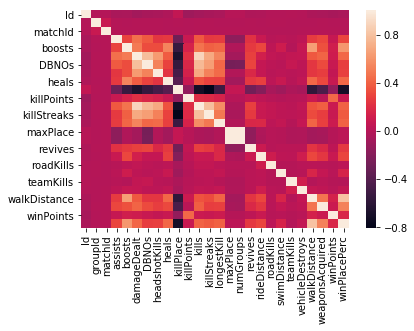

In [7]:
sns.heatmap(df.corr())

In [8]:
rdg = Ridge()
X = df.drop('winPlacePerc', axis=1)
y = df['winPlacePerc']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
rdg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [11]:
y_pred = rdg.predict(X_test)

In [12]:
rdg.score(X_test, y_test)

0.7922234021624289

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
gbr = GradientBoostingRegressor()

In [15]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [17]:
gbr.score(X_test, y_test)

0.872694449938445

In [20]:
fi = gbr.feature_importances_

In [21]:
names = X_test.columns

In [25]:
sorted(list(zip(names, fi)), key=lambda x: x[1])

[('Id', 0.0),
 ('groupId', 0.0),
 ('matchId', 0.0),
 ('headshotKills', 0.0),
 ('roadKills', 0.0),
 ('vehicleDestroys', 0.0),
 ('damageDealt', 0.00019364160082910176),
 ('teamKills', 0.002653089375941966),
 ('killPoints', 0.003863755155716395),
 ('rideDistance', 0.004525396112953388),
 ('revives', 0.006004524059773609),
 ('longestKill', 0.006337313135027287),
 ('swimDistance', 0.007508602394471102),
 ('heals', 0.00973095786639459),
 ('weaponsAcquired', 0.012884327361762734),
 ('DBNOs', 0.015962874634588054),
 ('winPoints', 0.018904204508881153),
 ('boosts', 0.02895445145824033),
 ('assists', 0.030307748826193793),
 ('killStreaks', 0.04913205301820893),
 ('kills', 0.07151454872564744),
 ('maxPlace', 0.09260441075834158),
 ('numGroups', 0.12709760274820786),
 ('walkDistance', 0.24409062851169488),
 ('killPlace', 0.2677298697471259)]